<a href="https://colab.research.google.com/github/sourav263/self-project/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import NearMiss               # Undersampling
from imblearn.over_sampling import RandomOverSampler       # Oversampling
from imblearn.combine import SMOTETomek                    # Both Undersampling & Oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [84]:
df=pd.read_csv('Fraud1.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111700 entries, 0 to 5111699
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 429.0+ MB


In [86]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [87]:
columns_to_clean = [
    'amount',  'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'isFraud'
]

df.dropna(subset=columns_to_clean, inplace=True)


In [88]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [89]:
df.shape

(5111699, 11)

In [90]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5072055,355,CASH_OUT,5338162.80,C1742651298,5338162.80,0.0,C866531579,181895.58,5520058.37,1.0,0.0
5080119,355,TRANSFER,3592596.97,C15678402,3592596.97,0.0,C1208224272,0.00,0.00,1.0,0.0
5080120,355,CASH_OUT,3592596.97,C1645091760,3592596.97,0.0,C504240309,1512703.69,5105300.66,1.0,0.0
5099866,355,TRANSFER,42483.97,C1483983582,42483.97,0.0,C1385439300,0.00,0.00,1.0,0.0


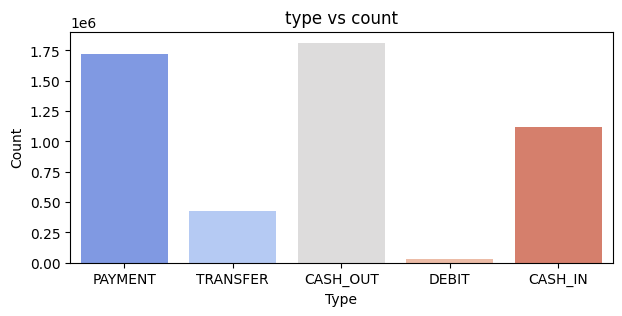

In [91]:
plt.figure(figsize=(7,3))
plt.title('type vs count')
sns.countplot(data=df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



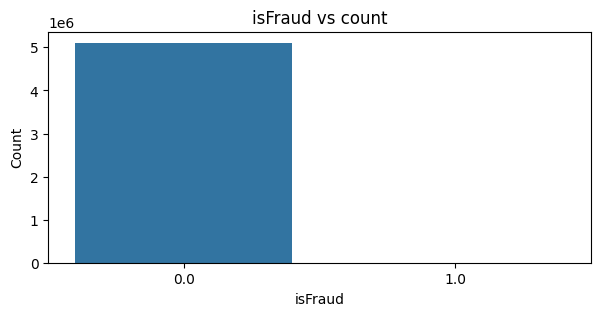

In [92]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()


In [93]:
# We can see from above visualization it is an imbalanced dataset .
df['isFraud'].value_counts()


0.0    5107738
1.0       3961
Name: isFraud, dtype: int64

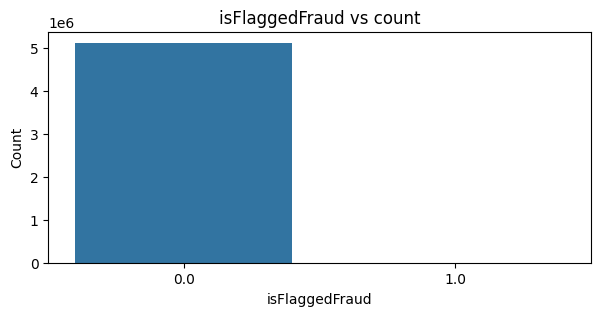

In [94]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFlaggedFraud vs count')
sns.countplot(data=df,x='isFlaggedFraud')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')
plt.show()


In [96]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)


No Frauds: 99.9225110868226
Frauds: 0.07748891317739953


In [97]:
numerical=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']


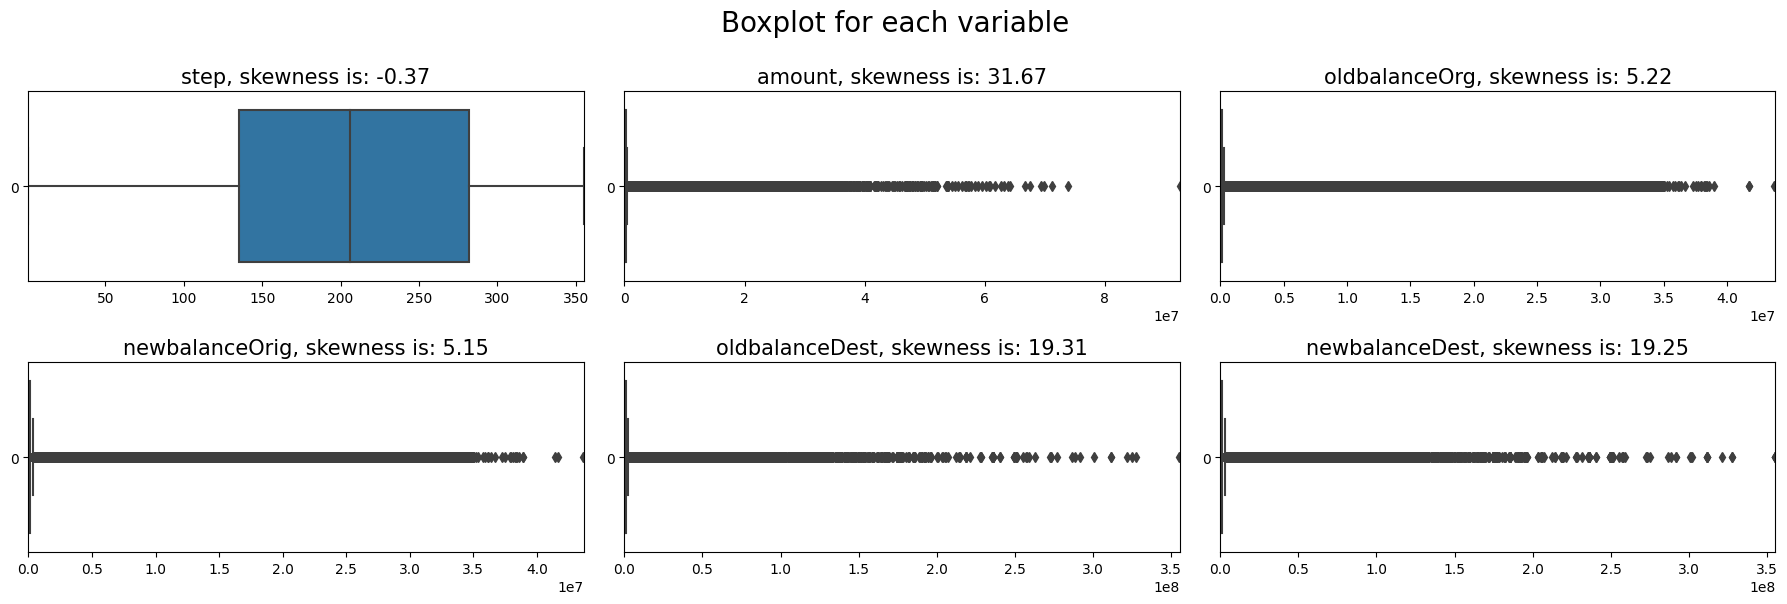

In [98]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,3,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()


In [99]:
# Checking nameOrig,nameDest column
nameOrig=df['nameOrig'].unique()
print("Unique in nameOrig:",len(nameOrig))
print(nameOrig)


Unique in nameOrig: 5105587
['C1231006815' 'C1666544295' 'C1305486145' ... 'C559903553' 'C448940617'
 'C894149037']


KeyError: ignored

In [100]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [102]:
# Splitting our data into independent and dependent features
x=df.drop('isFraud',axis=1)
y=df['isFraud']



In [103]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
5111694,355,TRANSFER,2457099.99,C1093652694,55258.0,0.00,C935587581,195316.76,2652416.75,0.0
5111695,355,TRANSFER,1058285.86,C1571096788,28640.0,0.00,C1188832587,0.00,1058285.86,0.0
5111696,355,PAYMENT,7905.54,C559903553,1173.0,0.00,M634689349,0.00,0.00,0.0
5111697,355,PAYMENT,1526.82,C448940617,0.0,0.00,M1876165229,0.00,0.00,0.0


In [104]:
y

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
5111694    0.0
5111695    0.0
5111696    0.0
5111697    0.0
5111698    0.0
Name: isFraud, Length: 5111699, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [106]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
1144088,131,TRANSFER,2084636.60,C1238256945,431218.65,0.00,C2074285009,10454926.19,12539562.80,0.0
4255326,306,CASH_IN,376750.21,C671543874,3396434.55,3773184.76,C1491110473,1316022.45,939272.24,0.0
1890882,165,PAYMENT,6913.72,C714664047,180107.00,173193.28,M1333807895,0.00,0.00,0.0
2441877,203,CASH_IN,119267.90,C1336793491,8571660.03,8690927.93,C2047110088,634998.83,515730.93,0.0
2783564,214,CASH_OUT,292480.44,C1698648939,0.00,0.00,C638822140,497740.58,790221.02,0.0
...,...,...,...,...,...,...,...,...,...,...
1606731,156,CASH_OUT,402715.41,C1752092471,32812.00,0.00,C985433330,1949455.70,2352171.11,0.0
1997099,179,CASH_IN,175278.24,C1470745,206267.00,381545.24,C703198692,0.00,0.00,0.0
3583510,261,CASH_OUT,99820.90,C569928153,21714.37,0.00,C2056327099,9441911.90,9541732.80,0.0
2300397,188,CASH_IN,140478.54,C1969042801,103449.87,243928.41,C576837677,1566726.32,1426247.78,0.0


In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

MemoryError: ignored